In [220]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import KFold
import numpy as np
from tensorflow.keras.models import Sequential

from tensorflow.keras.models import load_model

In [202]:
(X_train,y_train) , (X_test,y_test) = mnist.load_data()

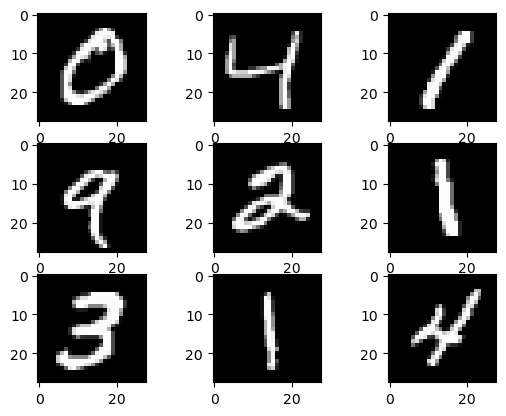

In [203]:
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(X_train[i],cmap = "gray")

In [204]:
print("X_train = ",X_train.shape)
print("y_train = ",y_train.shape)
print("X_test = ",X_test.shape)
print("y_test = ",y_test.shape)

X_train =  (60000, 28, 28)
y_train =  (60000,)
X_test =  (10000, 28, 28)
y_test =  (10000,)


In [205]:
X_train = X_train.reshape((X_train.shape[0],28,28,1))
X_test = X_test.reshape((X_test.shape[0],28,28,1))

In [206]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [207]:
def load_dataset():
    (X_train,y_train) , (X_test,y_test) = mnist.load_data()
    X_train = X_train.reshape((X_train.shape[0],28,28,1))
    X_test = X_test.reshape((X_test.shape[0],28,28,1))
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    return X_train,X_test,y_train,y_test

In [208]:
def prep_pixels(train,test):
    train_norm = train.astype("float32")
    test_norm = test.astype("float32")
    #normalisation
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    return train_norm,test_norm
    
    

In [209]:
def cnn_model():
    model = Sequential()
    #convolutional layer
    model.add(Conv2D(32,(3,3),activation = "relu",kernel_initializer= "he_uniform",input_shape = (28,28,1)))
    #pooling layer
    model.add(MaxPooling2D(2,2))
    #flatten the output from pooling layer(nD to 1d numpy array)
    model.add(Flatten())
    #fully connected layer
    model.add(Dense(100,activation = "relu",kernel_initializer="he_uniform"))
    model.add(Dense(10,activation = "softmax")) #output layer
    #compile model
    opt = SGD(learning_rate= 0.01,momentum= 0.9)
    model.compile(optimizer = opt,loss = "categorical_crossentropy",metrics = ["accuracy"])
    return model
    
    
    
    

In [210]:
def evaluate_model(dataX,dataY,n_folds = 5):
    scores,histories = [],[]
    #cross validation
    kfold = KFold(n_folds,shuffle = True,random_state = 1)
    for train_ix,test_ix in kfold.split(dataX):
        model = cnn_model()
        train_X,train_Y,test_X,test_Y = dataX[train_ix],dataY[train_ix],dataX[test_ix],dataY[test_ix]
        history = model.fit(train_X,train_Y,epochs = 10,batch_size = 32,validation_data = (test_X,test_Y),verbose = 1)
        _,acc = model.evaluate(test_X,test_Y,verbose = 1)
        print(f'{acc * 100:.3f}')
        scores.append(acc)
        histories.append(history)
    return scores,histories
    

In [211]:
def summarize_diagnostics(histories):
    for i in range(len(histories)):
        #plot loss
        plt.subplot(2,1,1)
        plt.title("Cross entropy loss")
        plt.plot(histories[i].history["loss"],color = "blue",label = "train")
        plt.plot(histories[i].history["val_loss"],color = "orange",label = "test")
        
        #plot accuracy
        
        plt.subplot(2,1,2)
        plt.title("Accuracy")
        plt.plot(histories[i].history["accuracy"],color = "blue",label = "train")
        plt.plot(histories[i].history["val_accuracy"],color = "orange",label = "test")
        plt.show()

In [212]:
def summarize_performance(scores):
    print("Accuracy: mean = {0},std = {1},n = {2}".format(np.mean(scores),np.std(scores),len(scores)))

In [213]:
def run_test_harness():
    trainX, testX,trainY, testY = load_dataset()
 # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
 # evaluate model
    scores, histories = evaluate_model(trainX, trainY)
 # learning curves
    summarize_diagnostics(histories)
 # summarize estimated performance
    summarize_performance(scores)

Epoch 1/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.1907 - accuracy: 0.9420 - val_loss: 0.0987 - val_accuracy: 0.9695
Epoch 2/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0641 - accuracy: 0.9816 - val_loss: 0.0872 - val_accuracy: 0.9725
Epoch 3/10
1500/1500 [==============================] - 11s 8ms/step - loss: 0.0398 - accuracy: 0.9876 - val_loss: 0.0626 - val_accuracy: 0.9822
Epoch 4/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0282 - accuracy: 0.9914 - val_loss: 0.0594 - val_accuracy: 0.9826
Epoch 5/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0186 - accuracy: 0.9946 - val_loss: 0.0565 - val_accuracy: 0.9834
Epoch 6/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0131 - accuracy: 0.9962 - val_loss: 0.0603 - val_accuracy: 0.9837
Epoch 7/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0091 - accuracy: 0.9976 - val_loss: 0.0561 - val_ac

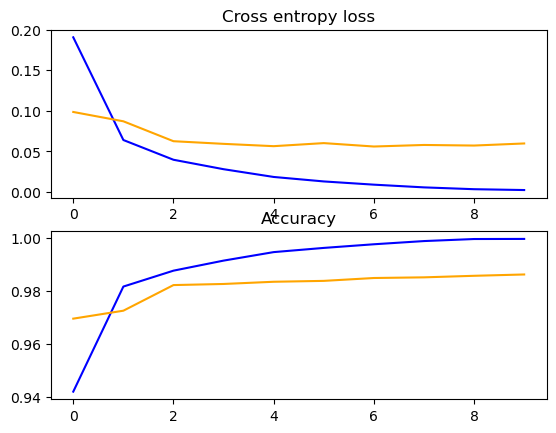

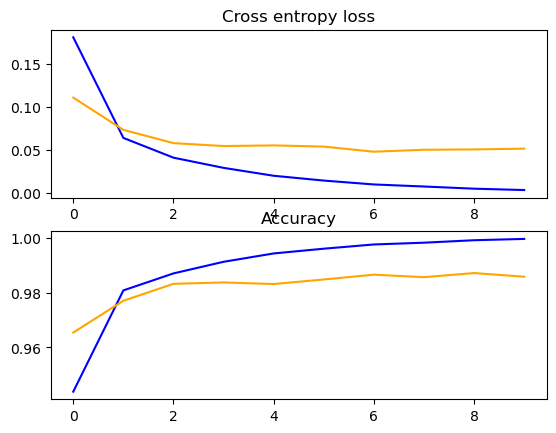

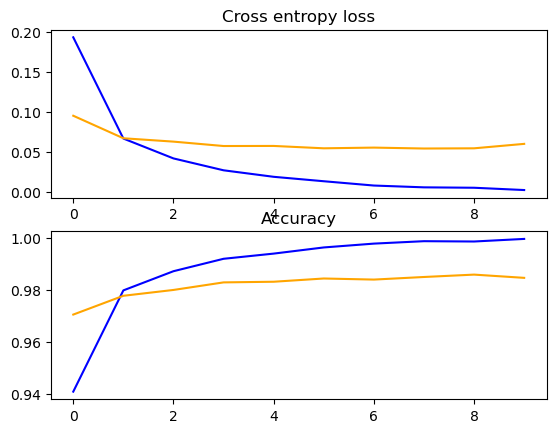

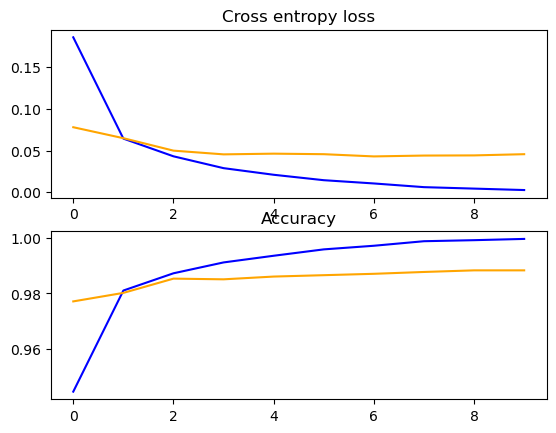

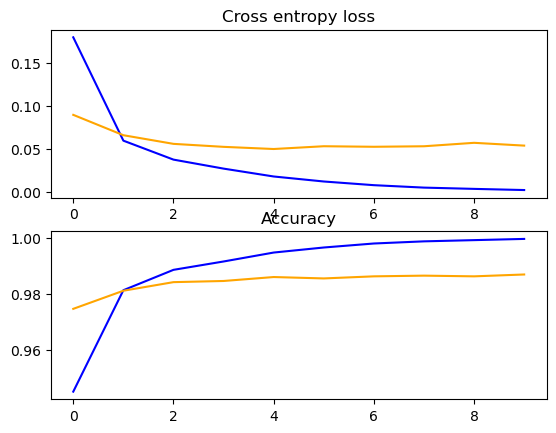

Accuracy: mean = 0.9863999962806702,std = 0.001208082841479989,n = 5


In [214]:
run_test_harness()

In [215]:
def actual_run():
    X_train,X_test,y_train,y_test = load_dataset()
    X_train,X_test = prep_pixels(X_train,X_test)
    model = cnn_model()
    model.fit(X_train,y_train,epochs = 10,batch_size = 32)
    model.save("final_model.h5")

In [216]:
actual_run()

Epoch 1/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1636 - accuracy: 0.9500
Epoch 2/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0557 - accuracy: 0.9833
Epoch 3/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0372 - accuracy: 0.9884
Epoch 4/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0249 - accuracy: 0.9927
Epoch 5/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0191 - accuracy: 0.9941
Epoch 6/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0115 - accuracy: 0.9972
Epoch 7/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0091 - accuracy: 0.9974
Epoch 8/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0060 - accuracy: 0.9983
Epoch 9/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0038 - accuracy: 0.9994
Epoch 10/10
1875/1875 [==============================] - 14s 8ms/step - l

C:\Users\aryan\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [222]:
def model_eval():
    trainX, testX, trainY,testY = load_dataset()
 # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
 # load model
    model = load_model('final_model.h5')
 # evaluate model on test dataset
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('> %.3f' % (acc * 100.0))

In [223]:
model_eval()

> 98.700
